<font size="5">**Data Science Section 002 Group 7 Project Report**

<font size="3">**Research question:**  How accurately can a knn-classification model utilizing age, serum cholesterol, and maximum heart rate achieved predict the presence or absence of heart disease in individuals?

Predictive data analysis plays an important role in the field of medical diagnostics. As cardiovascular disease continues to be a leading cause of global mortality, the development of efficient predictive models becomes crucial for detection and intervention. This analysis focuses on predicting the presence or absence of heart disease using key parameters from the Cleveland Database of the Heart Disease dataset, available on the UCI Machine Learning Repository (Janosi, 1988). The original database contains 76 attributes, but a version containing a subset of only 14 of those attributes will be used for this analysis. Out of those 14 variables, only 4 are chosen for observation in our project: age (age), serum cholesterol (chol), maximum heart rate achieved (thalach), and our predicted variable, the diagnosis of heart disease (num, renamed "diagnosis"). Our three predictor variables were chosen based on our research, which revealed that age, maximum heart rate, and serum cholesterol are all prevalent risk factors for heart disease (LeWine, 2023; Fryar, 2012).

By the end of this analysis, we expect to gain insight into the complex relationships between our chosen variables and the presence of heart disease in patients. Such findings would contribute to medical research regarding cardiovascular disease by providing insight into trends in the broader population of where the data was collected. Furthermore, this insight would allow healthcare systems to identify and focus on individuals at higher risk of heart diseases, and enable earlier intervention, improving patient outcomes. This insight could also contribute to reduced healthcare costs, as early detection and intervention could reduce the need for costly medical procedures associated with later stages of heart disease.

## Preliminary Data Analysis

### 1. Loading and tidying our data
To gain access to useful functions for reading and analyzing our data, the following libraries must be installed:

In [33]:
library(tidyverse)
library(tidymodels)
library(tibble)

We can now read our dataset into R and assign it to an object called cleveland_data. We are also going to limit the amount of rows shown when previewing the dataset:

In [34]:
#Demostration that the dataset can be read from the web into R:
options(repr.matrix.max.rows = 10)

url <- "https://raw.githubusercontent.com/Nitro-87/Group-2-Project-Proposal/main/processed.cleveland.data"
cleveland_data <- read_delim(url, delim= "," , col_names=FALSE)

cleveland_data
print("Table 0.1: Initial Dataset")

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3


[1] "Table 0.1: Initial Dataset"


Since our data contains no column names, we rename each column with the appropriate variable name below. We also replace the numerical values under our categorical variables with what they are supposed to represent, to better understand what each variable reveals to us.

In [35]:
#Renaming columns:

cleveland_data <- rename(cleveland_data,
       age = X1,
       sex = X2,
       chest_pain_type = X3,
       trestbps = X4,
       chol = X5,
       fbs = X6,    
       restecg = X7,
       thalach = X8,
       exang = X9,
       oldpeak = X10,
       slope = X11,
       ca = X12,
       thal = X13,
       diagnosis = X14)

#skipping rows with missing values
cleveland_data<- cleveland_data |> drop_na()

glimpse(cleveland_data)
print("Table 0.2: Dataset with Renamed Columns")

Rows: 303
Columns: 14
$ age             <dbl> 63, 67, 67, 37, 41, 56, 62, 57, 63, 53, 57, 56, 56, 44…
$ sex             <dbl> 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, …
$ chest_pain_type <dbl> 1, 4, 4, 3, 2, 2, 4, 4, 4, 4, 4, 2, 3, 2, 3, 3, 2, 4, …
$ trestbps        <dbl> 145, 160, 120, 130, 130, 120, 140, 120, 130, 140, 140,…
$ chol            <dbl> 233, 286, 229, 250, 204, 236, 268, 354, 254, 203, 192,…
$ fbs             <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, …
$ restecg         <dbl> 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, …
$ thalach         <dbl> 150, 108, 129, 187, 172, 178, 160, 163, 147, 155, 148,…
$ exang           <dbl> 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, …
$ oldpeak         <dbl> 2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 1.4, 3.1, 0.4,…
$ slope           <dbl> 3, 2, 2, 3, 1, 1, 3, 1, 2, 3, 2, 2, 2, 1, 1, 1, 3, 1, …
$ ca              <chr> "0.0", "3.0", "2.0", "0.0", "0.0", "0.0", "2.0", "0.0"…
$ thal            

In [36]:
#renaming categorical variables:

#renaming sex values
cleveland_data <- cleveland_data |>
mutate(sex = as_factor(sex))|>
mutate(sex = fct_recode(sex, "female" = "0", 
                            "male" = "1"))
#renaming chest pain values
cleveland_data <- cleveland_data |>
mutate(chest_pain_type = as_factor(chest_pain_type))|>
mutate(chest_pain_type = fct_recode(chest_pain_type, 
                            "typical angina" = "1", 
                            "atypical angina" = "2", 
                            "non-anginal_pain" = "3", 
                            "asymptomatic" = "4"))
#renaming fbs values
cleveland_data <- cleveland_data |>
mutate(fbs = as_factor(fbs))|>
mutate(fbs = fct_recode(fbs, "false" = "0", 
                            "true" = "1"))
#renaming exang values
cleveland_data <- cleveland_data |>
mutate(exang = as_factor(exang))|>
mutate(exang = fct_recode(exang, "no" = "0", 
                            "yes" = "1"))
#renaming slope values
cleveland_data <- cleveland_data |>
mutate(slope = as_factor(slope))|>
mutate(slope = fct_recode(thal,"upsloping" = "1", 
                            "flat" = "2", 
                            "downsloping" = "3"))
#renaming thal values
cleveland_data <- cleveland_data |>
mutate(thal = as_factor(thal))|>
mutate(thal = fct_recode(thal, "reversible defect" = "7.0", 
                            "fixed defect" = "6.0", 
                            "normal" = "3.0"))
#renaming diagnosis values
cleveland_data <- cleveland_data |>
mutate(diagnosis = as_factor(diagnosis))|>
mutate(diagnosis = fct_recode(diagnosis, 
                            "absent" = "0",
                              "present" = "1", 
                            "present" = "2", 
                            "present" = "3", 
                            "present" = "4"))

glimpse(cleveland_data)
print("Table 0.3: Dataset with Renamed Categorical Variables")

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `slope = fct_recode(thal, upsloping = "1", flat = "2",
  downsloping = "3")`.
Caused by warning:
! Unknown levels in `f`: 1, 2, 3”


Rows: 303
Columns: 14
$ age             <dbl> 63, 67, 67, 37, 41, 56, 62, 57, 63, 53, 57, 56, 56, 44…
$ sex             <fct> male, male, male, male, female, male, female, female, …
$ chest_pain_type <fct> typical angina, asymptomatic, asymptomatic, non-angina…
$ trestbps        <dbl> 145, 160, 120, 130, 130, 120, 140, 120, 130, 140, 140,…
$ chol            <dbl> 233, 286, 229, 250, 204, 236, 268, 354, 254, 203, 192,…
$ fbs             <fct> true, false, false, false, false, false, false, false,…
$ restecg         <dbl> 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, …
$ thalach         <dbl> 150, 108, 129, 187, 172, 178, 160, 163, 147, 155, 148,…
$ exang           <fct> no, yes, yes, no, no, no, no, yes, no, yes, no, no, ye…
$ oldpeak         <dbl> 2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 1.4, 3.1, 0.4,…
$ slope           <fct> 6.0, 3.0, 7.0, 3.0, 3.0, 3.0, 3.0, 3.0, 7.0, 7.0, 6.0,…
$ ca              <chr> "0.0", "3.0", "2.0", "0.0", "0.0", "0.0", "2.0", "0.0"…
$ thal            

We will be treating diagnosis as a categorical variable, so we should convert it into a factor using the as_factor() function:

In [37]:
cleveland_data <- cleveland_data |>
        mutate(diagnisis = as_factor(diagnosis))

We then want to filter our dataset to only include the diagnosis and variables that we want to observe which are age, chol, and thalach.

In [38]:
cleveland_data_select <- select(cleveland_data, age, chol, thalach, diagnosis)
cleveland_data_select

print("Table 0.4: Filtered Dataset with Selected Variables")

age,chol,thalach,diagnosis
<dbl>,<dbl>,<dbl>,<fct>
63,233,150,absent
67,286,108,present
67,229,129,present
37,250,187,absent
41,204,172,absent
⋮,⋮,⋮,⋮
45,264,132,present
68,193,141,present
57,131,115,present


[1] "Table 0.4: Filtered Dataset with Selected Variables"


### 2. Summarizing our dataset

To further understand our data, some preliminary exploratory data analysis is conducted below. 
Now that our data is tidy and filtered, we can split it into a training set to construct our model, and a testing set to test our model's effectiveness. We also set a seed value to ensure reproducibility of our data analysis.

In [39]:
set.seed(1000)

cleveland_data_split <- initial_split(cleveland_data_select, prop = 0.75, strata = diagnosis)
training_set <- training(cleveland_data_split)
testing_set <- testing(cleveland_data_split)

training_set
print("Table 0.5: Training set")
testing_set
print("Table 0.6: Testing set")

age,chol,thalach,diagnosis
<dbl>,<dbl>,<dbl>,<fct>
63,233,150,absent
41,204,172,absent
57,354,163,absent
56,294,153,absent
44,263,173,absent
⋮,⋮,⋮,⋮
63,197,136,present
59,176,90,present
57,241,123,present


[1] "Table 0.5: Training set"


age,chol,thalach,diagnosis
<dbl>,<dbl>,<dbl>,<fct>
37,250,187,absent
56,236,178,absent
62,268,160,present
57,192,148,absent
52,199,162,absent
⋮,⋮,⋮,⋮
64,227,155,absent
58,197,131,absent
58,318,140,present


[1] "Table 0.6: Testing set"


Below is a table conducting exploratory analysis on our training dataset. This table tells us the number and percentage of observations in each class group (whether there is a presence/absence of heart disease).

In [40]:
num_obs <- nrow(training_set)
training_set |>
  group_by(diagnosis) |>
  summarize(
    count = n(),
    percentage = n() / num_obs * 100)

print("Table 0.7: Summary Table")

diagnosis,count,percentage
<fct>,<int>,<dbl>
absent,123,54.18502
present,104,45.81498


[1] "Table 0.7: Summary Table"


The table above informs us that the "absent" class represents the majority of the training data, making up 54% of the data.

### 3. Visualizing our dataset

Next, we create grids of separate histogram plots, ploting the distributions of age, serum cholestorol and maximum heart rate achieved by diagnosis. This visualization helps us more clearly see the relationship between each variable and each possible diagnosis, and will help us further justify our variable selection.

[1] "Figure 0.1: Distribution of Age Distribution by Diagnosis"


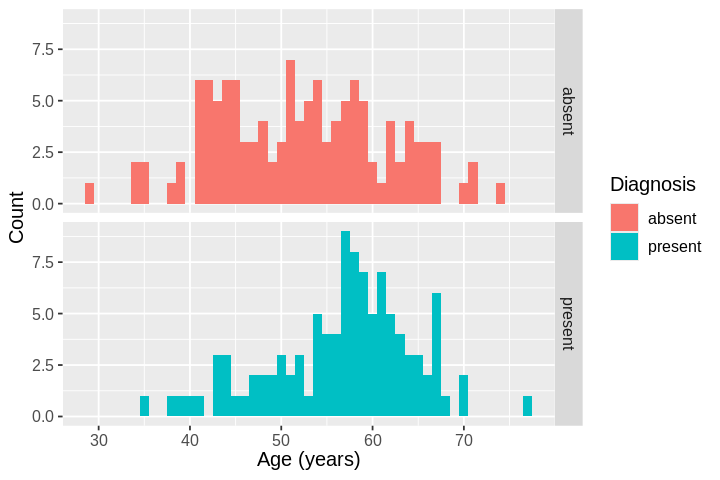

[1] "Figure 0.2: Distribution of Serum Cholestorol Distribution by Diagnosis"


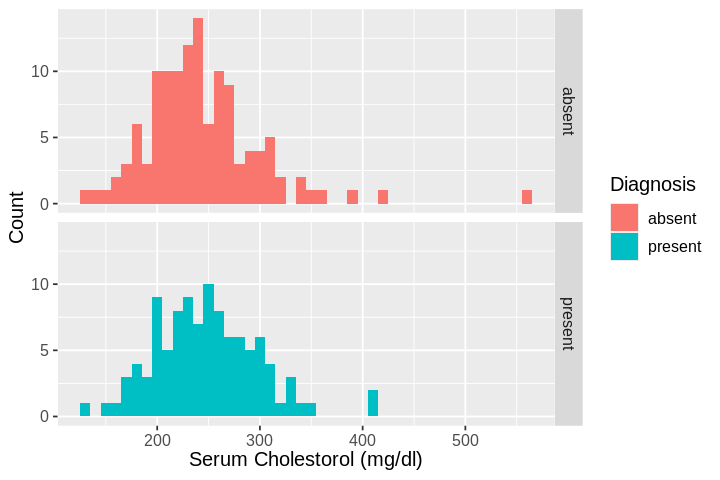

[1] "Figure 0.3: Distribution of Maximum Heart Rate Achieved Distribution by Diagnosis"


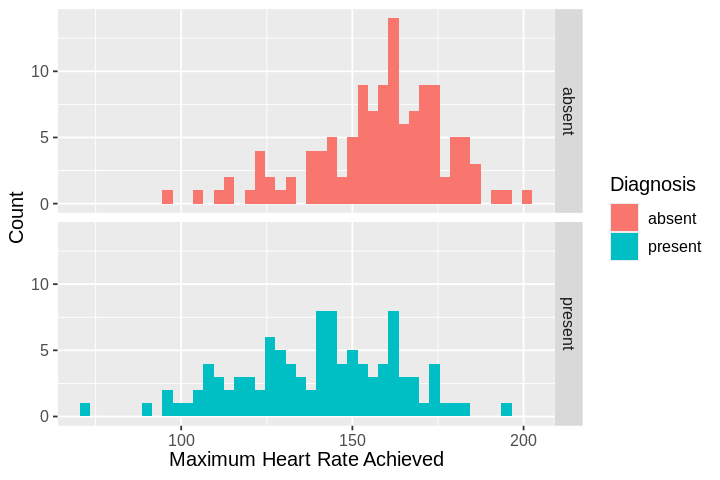

In [41]:
options(repr.plot.width=6, repr.plot.height=4)

# Plotting distribution of Age
age_hist <- ggplot(training_set, aes(x = age, fill = as_factor(diagnosis))) +
  geom_histogram(position = "identity", binwidth=1) +
  facet_grid(rows = vars(diagnosis))  +
  labs(x = "Age (years)",
       y = "Count",
       fill = "Diagnosis") +
  theme(text = element_text(size = 12))

age_hist
print("Figure 0.1: Distribution of Age Distribution by Diagnosis")

# Plotting distribution of Serum Cholestorol
chol_hist <- ggplot(training_set, aes(x = chol, fill = as_factor(diagnosis))) +
  geom_histogram(position = "identity", binwidth=10) +
  facet_grid(rows = vars(diagnosis)) +
  labs(x = "Serum Cholestorol (mg/dl)",
       y = "Count",
       fill = "Diagnosis") +
  theme(text = element_text(size = 12))

chol_hist
print("Figure 0.2: Distribution of Serum Cholestorol Distribution by Diagnosis")

# Plotting distribution of Maximum Heart Rate
thalach_hist <- ggplot(training_set, aes(x = thalach, fill = as_factor(diagnosis))) +
  geom_histogram(position = "identity", binwidth=3) +
  facet_grid(rows = vars(diagnosis))+
  labs(x = "Age",
       y = "Count",
       fill = "Diagnosis") +
  theme(text = element_text(size = 12))+
  labs(x = "Maximum Heart Rate Achieved",
       y = "Count",
       fill = "Diagnosis") +
  theme(text = element_text(size = 12)) 

thalach_hist
print("Figure 0.3: Distribution of Maximum Heart Rate Achieved Distribution by Diagnosis")


The first plot reveals that heart disease is more present in older individuals, confirming that age is a determining factor for the presense of heart disease. In the second plot, we observe that there is less of a presence of heart disease in those with lower serum cholestorol, again indicating that there is a relationship between the two variables. In the final plot, we see that a higher maximum heart rate is related to a lower likelihood of having heart disease. This confirms that Maximum heart rate does indeed influence the presence of heart disease, and corresponds with our findings that a low maximum heart rate can signify a higher risk of heart disease (LeWine, 2023).  

Thus, the histograms above indicate that age, serum cholestorol, and maximum heart rate achieved are suitable predictor variables to use in the prediction of heart disease presence in individuals.

## Analysis


We have chosen to use the K-nearest neighbors classification algorithm to continue our analysis, as it allows us to scale and compare our different variables in an easy and efficient way. The goal is to create and test a model using the training and testing data, respectively. We will be using this model to analyze the data in relation to the selected variables, and aim to effectively classify our testing data. To do so, we will utilize cross validation in choosing a parameter K, and then build a KNN model, use the KNN model on our testing data, and analyze our findings. 



### 1. Cross-validation


First we create our recipe using our training data, indicating that we will be using thalach (maximum heart rate), chol (serum cholestorol), and age as our predictor variables for the diagnosis. We also scale and center the data to ensure all observations are on a comparable scale and contribute equal shares to the calculations of our knn model.

In [43]:
#creating the recipe with centering and scaling

heart_recipe <- recipe(diagnosis ~ thalach+ chol+ age, data = training_set) |>
step_scale(all_predictors()) |>
step_center(all_predictors())

heart_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 3



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



Next, we create a model specification for knn classification, setting the number of neighbors to be tuned so that we can find the best value.

In [44]:
#creating a knn model specification

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
       set_engine("kknn") |>
       set_mode("classification")

knn_tune

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


We then employ 10-fold cross-validation, splitting our training data into 10 evenly sized chunks to compare the classifier’s performance for different K-values.

In [45]:
#performing cross-validation
heart_vfold <- vfold_cv(training_set, v = 10, strata = diagnosis)


### 2. K-value selection


Our next step is to create a workflow using our recipe and model specification, testing K values of 1 to 100 (with intervals of 5) for our neighbors variable. We also filter the dataset so we can view the accuracies for each of the tested k values.


In [47]:
# creating dataframe with sequence of values of K to try
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

#creating a workflow that combines our recipe and new model specification
knn_results <- workflow() |>
       add_recipe(heart_recipe) |>
       add_model(knn_tune) |>
       tune_grid(resamples = heart_vfold, grid = k_vals) |>
collect_metrics()

accuracies <- knn_results |> 
       filter(.metric=="accuracy")
accuracies
print("Table 1.1: Mean Accuracies of tested K-values")

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5718379,10,0.02681157,Preprocessor1_Model01
6,accuracy,binary,0.6381258,10,0.01813013,Preprocessor1_Model02
11,accuracy,binary,0.6470356,10,0.02375632,Preprocessor1_Model03
16,accuracy,binary,0.6557477,10,0.02712897,Preprocessor1_Model04
21,accuracy,binary,0.6788538,10,0.02742290,Preprocessor1_Model05
⋮,⋮,⋮,⋮,⋮,⋮,⋮
76,accuracy,binary,0.6883235,10,0.03611366,Preprocessor1_Model16
81,accuracy,binary,0.6873847,10,0.02988736,Preprocessor1_Model17
86,accuracy,binary,0.6745059,10,0.02980812,Preprocessor1_Model18


[1] "Table 1.1: Mean Accuracies of tested K-values"


To help us determine which of the tested numbers is the best K value, we visualize our findings by plotting the accuracy vs K below.

[1] "Figure 1.1: Graph of Accuracy vs K"


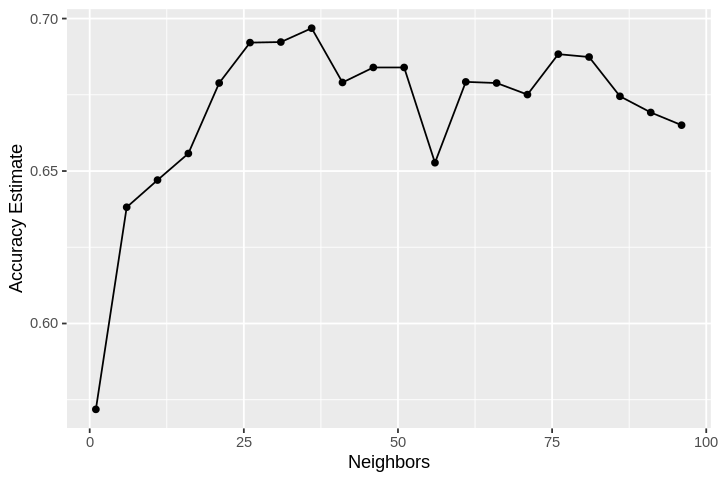

In [48]:
#plotting accuracy vs K

options(repr.plot.height=4, repr.plot.width=6)

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate")

accuracy_versus_k
print("Figure 1.1: Graph of Accuracy vs K")

From the plot above, we can see that the highest accuracy is obtained somewhere between K=25 and K=50. We can obtain the number of neighbours more accurately by doing it programmatically as shown below:

In [49]:
#finding the best k
best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

#finding the mean of the best k
best_k_mean <-accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(mean)

best_k_mean


[1] 36

[1] 0.6968379

We find that setting the number of neighbors to K=36 provides the highest cross-validation accuracy estimate, which is shown to be 69.68% above. Thus, we will use K=36 for the rest of this analysis. 

Below, we create a knn model specification with our K value of 36, and then create a workflow using this model and our previously created recipe.

In [50]:
#creating the k-nn model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 36) |>
       set_engine("kknn") |>
       set_mode("classification")

#training the classifier
heart_fit <- workflow() |>
       add_recipe(heart_recipe) |>
       add_model(knn_spec) |>
       fit(data = training_set)

heart_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(36,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3215859
Best kernel: rectangular
Best k: 36

### 3. Evaluating on test set

We can now use the predict function with our workflow to make predictions on our testing set. These predictions will be used to evaluate our classifier's accuracy, precision and recall.

In [51]:
#predicting class labels for test set

test_predictions <- predict(heart_fit , testing_set) |>
       bind_cols(testing_set)

test_predictions
print("Table 1.2: Predictions Made on Testing Set")

.pred_class,age,chol,thalach,diagnosis
<fct>,<dbl>,<dbl>,<dbl>,<fct>
absent,37,250,187,absent
absent,56,236,178,absent
present,62,268,160,present
present,57,192,148,absent
absent,52,199,162,absent
⋮,⋮,⋮,⋮,⋮
present,64,227,155,absent
present,58,197,131,absent
present,58,318,140,present


[1] "Table 1.2: Predictions Made on Testing Set"


Now we can assess our classifier's performance by examining its accuracy, as well as computing its precison and recall. We first need to check the order of the labels so that we can specify what factor level the positive class corresponds to. Misclassifying the presence of heart disease may lead to a patient who requires treatment not receiving it, which could have disastrous consequences. Therefore, we should focus more on the presence of heart disease, so we identify "present" as our positive label and "absent" as our negative label. In this context, we prioritize recall because we would like our classifier to be able to predict the presence of heart disease where it is present. Below, we create a combined table with our accuracy, precision and recall values.

In [52]:
#checking the order of the labels in the diagnosis variable
test_predictions |> pull(diagnosis) |> levels()

# Creating combined table
combined_table <- list(
    
 #finding out our classifier's accuracy
prediction_accuracy <- test_predictions |>
         metrics(truth = diagnosis, estimate = .pred_class) |>
         filter(.metric == "accuracy"),
  
#computing precision
test_predictions |>
  precision(truth = diagnosis, estimate = .pred_class, event_level = "second"),
  
#computing recall
test_predictions |>
  recall(truth = diagnosis, estimate = .pred_class, event_level = "second")) |>
  bind_rows(.id = "Table")

combined_table
print("Table 1.3: Classifier Accuracy, Precision and Recall")

[1] "absent"  "present"

Table,.metric,.estimator,.estimate
<chr>,<chr>,<chr>,<dbl>
1,accuracy,binary,0.6710526
2,precision,binary,0.6388889
3,recall,binary,0.6571429


[1] "Table 1.3: Classifier Accuracy, Precision and Recall"


We also create a confusion matrix to tell us how many test set diagnoses are predicted correctly and incorrectly, and give us insight on the types of mistakes our classifier is making.

In [53]:
#creating confusion matrix for the classifier
heart_mat <- test_predictions |> 
conf_mat(truth = diagnosis, estimate = .pred_class)

heart_mat
print("Table 1.4: Classifier Confusion Matrix")

          Truth
Prediction absent present
   absent      28      12
   present     13      23

[1] "Table 1.4: Classifier Confusion Matrix"


The output shows that the estimated accuracy of the classifier on the test data is 67%, and the estimated precision and recall of the classifier on the test data was 64% and 66%, respectively.

Finally, we can use collect_metrics to view the mean and standard error and mean of the classifier’s validation accuracy across the folds. This provides us with insight on the reliability of our model's performance metrics.

In [54]:
#finding mean and standard error + establishing prediction accuracy
heart_metrics <- workflow() |>
       add_recipe(heart_recipe) |>
       add_model(knn_spec) |>
       fit_resamples(resamples = heart_vfold) |> 
collect_metrics()

heart_metrics
print("Table 1.5: Classifier's Mean Prediction Accuracy and Standard Error")

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.6968379,10,0.03389889,Preprocessor1_Model1
roc_auc,binary,0.7094988,10,0.03193610,Preprocessor1_Model1


[1] "Table 1.5: Classifier's Mean Prediction Accuracy and Standard Error"


According to the dataframe above, the estimated mean accuracy is 0.71 and standard error is approximately 0.03. Thus, we can expect the true average accuracy of the classifier to be between 68% and 74%. 

## Discussion

To evaluate our classifier's performance, we compared its accuracy to the majority classifier as a baseline. Since the majority classifier always guesses the majority class label from the training data, and our majority class label is "absent", we can suspect that the majority classifier will have an accuracy of approximately 54% (see table 0.7). The classifier we built had an accuracy of 67% on our test split (see table 1.3), which shows improvement from the basic majority classifier. This is good news, as it suggests that our model was successful at capturing meaningful patterns in the data. However, in the context of this analysis, it is very important not to misdiagnose heart disease as absent when it is present, so that all patients who need medical care can receive it promptly. The confusion matrix obtained from our classifier's predictions (see table 1.4) shows that the classifier misdiagnoses 12 "present" cases as "absent", which is a significant amount, and a cause for concern. Therefore, even though the accuracy of our classifier is better than that of the majority classifier, further analysis suggests that this classifier is unsuitable for its intended application. In addition to computing our classifier's accuracy on our single test split, we also computed our classifier's estimated mean validation accuracy (see table 1.5), which tells us about our model's ability to generalize to new, unseen data. However, this accuracy, which we found to be between 68% and 74%, is still unreliable considering the context of this data analysis. Therefore, even though the accuracy of our classifier is better than that of the majority classifier, further analysis suggests that this classifier is unsuitable for its intended application.

Our findings highlight how accuracy alone does not provide a complete picture of a classifier's performance, and why it is crucial to consider the specific context of the classification task. In the case of diagnosing heart disease, the high rate of misclassification found in our confusion matrix represents instances where patients with heart disease may go undetected, potentially leading to adverse health effects (Dalen, 2014). We can conclude that this model needs further refinement before it can be used in practice.

Although we expected our classifier to perform a better job than it did, we recognize that developing an accurate classifier for heart disease diagnosis is a complex task. Despite the careful selection of our variables and the research behind our decisions, there are various other factors that contribute to the presence of heart disease in patients. Therefore, in exploring methods for improving our model's accuracy and reliability, we can take more of these factors into consideration. A variety of questions could arise from the results of this analysis as we try to enhance the performace of our model. For example, we could inquire about how lifestyle and behavioral factors such as smoking habits, exercise and diet interact with cholesterol, age and heart rate to influence the risk of heart disease in patients. We could also question whether the model and its findings generalize to different populations, and discuss how to make the model applicable and effective for more diverse populations. In summary, although our classifier showed improvement from the majority classifier, the misclassification errors present indicated that significant refinement is neccesary before this model can be used in practice. By considering additional variables and taking diverse populations into account, we can develop a more effective predictive model for the diagnosis of heart disease.

## References

Dalen, J. E., Alpert, J. S., Goldberg, R. J., & Weinstein, R. S. (2014). The epidemic of the 20th century: coronary heart disease. The American journal of medicine, 127(9), 807-812. https://www.sciencedirect.com/science/article/pii/S0002934314003544

Fryar CD, Chen T-C, Li X. (2012.) Prevalence of uncontrolled risk factors for cardiovascular disease: United States, 1999–2010. https://www.cdc.gov/nchs/data/databriefs/db103.pdf 

Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.

LeWine, H. (2023.) What is a normal heart rate? https://www.health.harvard.edu/heart-health/what-your-heart-rate-is-telling-you#:~:text=It%20speeds%20up%20and%20slows,disease%20or%20other%20medical%20condition